In [1]:
# Import necessary libraries for data manipulation and analysis
import numpy as np # Numerical operations
import pandas as pd # Data manipulation
from datetime import datetime, timedelta # Date operations

#Import necessary libraries for transformations
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy import stats
from scipy.stats import skew, kurtosis

# Import libraries for plotting and visualization
import matplotlib.pyplot as plt # Matplotlib for basic plotting
import seaborn as sns # Seaborn for enhanced visualization
import plotly.express as px # Plotly for interactive plots

# Import libraries for time series analysis and modeling
from statsmodels.tsa.stattools import adfuller # Augmented Dickey-Fuller Test for stationarity check
from statsmodels.tsa.stattools import kpss # Kwiatkowski-Phillips-Schmidt-Shin Test for stationarity check
from statsmodels.tsa.statespace.sarimax import SARIMAX # SARIMAX model for time series forecasting
from statsmodels.tsa.seasonal import seasonal_decompose # Seasonal decomposition for trend, seasonal, and residual components
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima #SARIMAX using pmdarima

# Import necessary libraries for computing acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # For autocorrelation and partial autocorrelation plots
from statsmodels.tsa.stattools import acf, pacf  # For computing autocorrelation and partial autocorrelation

import joblib



SARIMAX for Visayas
DATA PREPROCESSING

In [3]:
labels_csv = r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Visayas\train_labels_transformed.csv'
data_csv = r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Visayas\train_data_transformed.csv'
test_data_csv=r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Visayas/test_data.csv'
test_labels_csv=r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Visayas/test_labels.csv'
transformed_data=r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Visayas/data_transformed.csv'
transformed_test=r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Visayas/test_data_transformed.csv'
complete_data = r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Visayas/VIS_Daily_Complete.csv'

transformed_train_data = pd.read_csv(data_csv)
transformed_train_labels = pd.read_csv(labels_csv)
transformed_data = pd.read_csv(transformed_data)
transformed_test_data = pd.read_csv(transformed_test)

test_data = pd.read_csv(test_data_csv)
test_labels = pd.read_csv(test_labels_csv)

complete_data_df = pd.read_csv(complete_data)
gwap = complete_data_df[['GWAP']]
lwap = complete_data_df[['LWAP']]

In [4]:
train_size = int(len(transformed_train_labels))  
test_size = int(len(test_data))

date_range = pd.date_range(start='2022-01-01', end='2023-12-31', freq='D')
date_df = pd.DataFrame(date_range, columns=['Date'])

train_date = date_df[:train_size]
test_date = date_df[train_size:]

#Resetting the Index
train_date = train_date.reset_index(drop=True)
test_date = test_date.reset_index(drop=True)


In [26]:
#Preparing the dataframes
transformed_train_labels.rename(columns={'0': 'GWAP', '1': 'LWAP'}, inplace=True)
labels_columns = ['GWAP', 'LWAP']
labels_train = pd.DataFrame(transformed_train_labels, columns = labels_columns)
labels_test = pd.DataFrame(test_labels, columns = labels_columns)
transformed_train_data.rename(columns={'0':'FLOW_VIS', '1':'TMIN_Catbalogan', '2':'TMAX_Roxas City','3':'TMIN_Roxas City','4':'TMAX_Catarman','5':'TMIN_Catarman','6':'TMAX_Maasin','7':'TMIN_Maasin','8':'TMAX_Dumaguete', '9':'TMIN_Dumaguete', '10':'GWAP','11':'LWAP','12':'Hourly Demand','13':'TMAX_Catbalogan','14':'RESERVE_GWAP_Fr','15':'RESERVE_GWAP_Ru','16':'RESERVE_GWAP_Rd','17':'RESERVE_GWAP_Dr','18':'RAINFALL_Catbalogan','19':'RAINFALL_Roxas City','20':'RAINFALL_Catarman','21':'RAINFALL_Maasin','22':'RAINFALL_Dumaguete'}, inplace=True)
data_columns = ['FLOW_VIS', 'TMIN_Catbalogan', 'TMAX_Roxas City', 'TMIN_Roxas City', 'TMAX_Catarman', 'TMIN_Catarman', 'TMAX_Maasin', 'TMIN_Maasin', 'TMAX_Dumaguete', 'TMIN_Dumaguete','GWAP', 'LWAP', 'Hourly Demand', 'TMAX_Catbalogan','RESERVE_GWAP_Fr', 'RESERVE_GWAP_Ru', 'RESERVE_GWAP_Rd', 'RESERVE_GWAP_Dr', 'RAINFALL_Catbalogan', 'RAINFALL_Roxas City', 'RAINFALL_Catarman', 'RAINFALL_Maasin', 'RAINFALL_Dumaguete']

#Rename columns of complete transformed dataframe
transformed_data.rename(columns={'0':'FLOW_VIS', '1':'TMIN_Catbalogan', '2':'TMAX_Roxas City','3':'TMIN_Roxas City','4':'TMAX_Catarman','5':'TMIN_Catarman','6':'TMAX_Maasin','7':'TMIN_Maasin','8':'TMAX_Dumaguete', '9':'TMIN_Dumaguete', '10':'GWAP','11':'LWAP','12':'Hourly Demand','13':'TMAX_Catbalogan','14':'RESERVE_GWAP_Fr','15':'RESERVE_GWAP_Ru','16':'RESERVE_GWAP_Rd','17':'RESERVE_GWAP_Dr','18':'RAINFALL_Catbalogan','19':'RAINFALL_Roxas City','20':'RAINFALL_Catarman','21':'RAINFALL_Maasin','22':'RAINFALL_Dumaguete'}, inplace=True)

#Extracting transformed test data
transformed_test_data.rename(columns={'0':'FLOW_VIS', '1':'TMIN_Catbalogan', '2':'TMAX_Roxas City','3':'TMIN_Roxas City','4':'TMAX_Catarman','5':'TMIN_Catarman','6':'TMAX_Maasin','7':'TMIN_Maasin','8':'TMAX_Dumaguete', '9':'TMIN_Dumaguete', '10':'GWAP','11':'LWAP','12':'Hourly Demand','13':'TMAX_Catbalogan','14':'RESERVE_GWAP_Fr','15':'RESERVE_GWAP_Ru','16':'RESERVE_GWAP_Rd','17':'RESERVE_GWAP_Dr','18':'RAINFALL_Catbalogan','19':'RAINFALL_Roxas City','20':'RAINFALL_Catarman','21':'RAINFALL_Maasin','22':'RAINFALL_Dumaguete'}, inplace=True)
transformed_labels_test = pd.DataFrame(transformed_test_data, columns = labels_columns)

data_train = pd.DataFrame(transformed_train_data, columns = data_columns)
data_test = pd.DataFrame(test_data, columns = data_columns)



In [27]:
#lagging the transformed data
transformed_data = transformed_data.shift(1)
transformed_data = transformed_data.fillna(0)

#Removing GWAP and LWAP
transformed_exog = transformed_data.drop(columns=['GWAP','LWAP'])



Multicollinearity Test

In [28]:
#Iteratively checking multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'exog_data' contains your exogenous variables
X = transformed_exog.copy()
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)



                feature        VIF
0              FLOW_VIS   9.129910
1       TMIN_Catbalogan  55.936935
2       TMAX_Roxas City  39.578027
3       TMIN_Roxas City  21.576231
4         TMAX_Catarman  46.111639
5         TMIN_Catarman  29.824963
6           TMAX_Maasin  41.617187
7           TMIN_Maasin  30.686968
8        TMAX_Dumaguete  35.126200
9        TMIN_Dumaguete  11.598299
10        Hourly Demand  24.908144
11      TMAX_Catbalogan  20.497729
12      RESERVE_GWAP_Fr   6.365660
13      RESERVE_GWAP_Ru   5.338283
14      RESERVE_GWAP_Rd   2.749947
15      RESERVE_GWAP_Dr   7.981435
16  RAINFALL_Catbalogan   7.840969
17  RAINFALL_Roxas City   7.192331
18    RAINFALL_Catarman  10.873146
19      RAINFALL_Maasin   8.073954
20   RAINFALL_Dumaguete  65.296746


In [29]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

# Check and remove high VIF variables iteratively
high_vif_threshold = 10  # Set your threshold here
while True:
    vif_data = calculate_vif(X)
    max_vif = vif_data['VIF'].max()
    
    if max_vif > high_vif_threshold:
        # Find the variable with the highest VIF
        feature_to_drop = vif_data.loc[vif_data['VIF'] == max_vif, 'feature'].values[0]
        print(f"Dropping {feature_to_drop} with VIF of {max_vif}")
        # Drop the variable and recalculate VIF
        X.drop(columns=[feature_to_drop], inplace=True)
    else:
        break

print("Final VIF values:\n", calculate_vif(X))
display(X)

Dropping RAINFALL_Dumaguete with VIF of 65.29674631934793
Dropping TMIN_Catbalogan with VIF of 55.592071958781716
Dropping TMAX_Catarman with VIF of 45.48798555063103
Dropping TMAX_Maasin with VIF of 40.07936908388279
Dropping TMAX_Roxas City with VIF of 33.03623092152843
Dropping TMAX_Dumaguete with VIF of 27.110200095905675
Dropping TMIN_Maasin with VIF of 23.936749174927456
Dropping Hourly Demand with VIF of 20.170772096311875
Dropping TMIN_Catarman with VIF of 17.56834174414654
Dropping TMIN_Roxas City with VIF of 14.474557833673414
Final VIF values:
                 feature       VIF
0              FLOW_VIS  6.483433
1        TMIN_Dumaguete  8.476874
2       TMAX_Catbalogan  6.546150
3       RESERVE_GWAP_Fr  5.568371
4       RESERVE_GWAP_Ru  4.699619
5       RESERVE_GWAP_Rd  2.501990
6       RESERVE_GWAP_Dr  6.098944
7   RAINFALL_Catbalogan  6.965083
8   RAINFALL_Roxas City  5.824913
9     RAINFALL_Catarman  8.730491
10      RAINFALL_Maasin  5.800787


,FLOW_VIS,TMIN_Dumaguete,TMAX_Catbalogan,RESERVE_GWAP_Fr,RESERVE_GWAP_Ru,RESERVE_GWAP_Rd,RESERVE_GWAP_Dr,RAINFALL_Catbalogan,RAINFALL_Roxas City,RAINFALL_Catarman,RAINFALL_Maasin
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.340575,0.283019,0.053964,0.000000,0.000000,0.000000,0.000000,0.645009,0.355331,0.480482,0.909746
3,0.340575,0.301887,0.115798,0.000000,0.000000,0.000000,0.000000,0.000000,0.530463,0.536810,0.946830
4,0.340838,0.509434,0.232212,0.000000,0.000000,0.000000,0.000000,0.267562,0.437681,0.303641,0.881793
...,...,...,...,...,...,...,...,...,...,...,...
725,0.263407,0.641509,0.172698,0.000007,0.000000,0.999903,0.080173,0.688236,0.703114,0.744513,0.838958
726,0.227998,0.528302,0.499511,0.286475,0.692074,0.999624,0.752703,0.569524,0.000000,0.638050,0.551440
727,0.133112,0.490566,0.355802,0.282651,0.546595,0.999512,0.817765,0.298766,0.718014,0.678029,0.675988
728,0.126162,0.433962,0.627124,0.000008,0.699256,0.999600,0.785420,0.468541,0.355331,0.444729,0.308271


In [30]:
#Preparing the exog datasets
train_exog = X[:train_size]
test_exog = X[train_size:]


In [31]:
#Preparing transformed GWAP datasets
GWAP_train = labels_train['GWAP']
GWAP_train = pd.concat([train_date,GWAP_train], axis=1)
GWAP_train.set_index('Date', inplace=True)
GWAP_train.index = pd.to_datetime(GWAP_train.index)
GWAP_train = GWAP_train.squeeze()


GWAP_test = transformed_labels_test['GWAP']
GWAP_test = pd.concat([test_date,GWAP_test], axis=1)
GWAP_test.set_index('Date', inplace=True)
GWAP_test.index = pd.to_datetime(GWAP_test.index)
GWAP_test = GWAP_test.squeeze()

#Preparing original GWAP datasets
GWAP = pd.concat([date_df,gwap], axis=1)
GWAP.set_index('Date', inplace=True)
GWAP.index = pd.to_datetime(GWAP.index)
GWAP = GWAP.squeeze()

GWAP_test_inversed = GWAP[train_size:]


#Preparing the transformed LWAP datasets
LWAP_train = labels_train['LWAP']
LWAP_train = pd.concat([train_date,LWAP_train], axis=1)
LWAP_train.set_index('Date', inplace=True)
LWAP_train.index = pd.to_datetime(LWAP_train.index)
LWAP_train = LWAP_train.squeeze()

LWAP_test = transformed_labels_test['LWAP']
LWAP_test = pd.concat([test_date,LWAP_test], axis=1)
LWAP_test.set_index('Date', inplace=True)
LWAP_test.index = pd.to_datetime(LWAP_test.index)
LWAP_test = LWAP_test.squeeze()

#Preparing the original LWAP datasets

LWAP = pd.concat([date_df,lwap], axis=1)
LWAP.set_index('Date', inplace=True)
LWAP.index = pd.to_datetime(LWAP.index)
LWAP = LWAP.squeeze()

LWAP_test_inversed = LWAP[train_size:]



#Preparing the exogenous datasets
exog_train = pd.concat([train_date,train_exog], axis=1)
exog_train.set_index('Date', inplace=True)

test_exog = pd.DataFrame(test_exog)
test_exog = test_exog.reset_index()
exog_test = pd.concat([test_date,test_exog], axis=1)
exog_test.set_index('Date', inplace=True)
exog_test = exog_test.drop(columns=['index'])

In [32]:
#Applying the inverse transformations
#Loading inverse transformations for Visayas

minmax_fit_loaded = joblib.load(r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Visayas/minmax_scaler.pkl')
boxcox_fit_loaded = joblib.load(r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Visayas/boxcox_pipeline.pkl')
yeojohnson_fit_loaded = joblib.load(r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Visayas/yeojohnson_pipeline.pkl')
boxcoxy_fit_loaded = joblib.load(r'C:\Users\Jojie\Desktop\School\Senior\Thesis\SARIMAX\Visayas/boxcox_pipeliney.pkl')

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:380: InconsistentVersionWarning:

Trying to unpickle estimator MinMaxScaler from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:380: InconsistentVersionWarning:

Trying to unpickle estimator PowerTransformer from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

C:\Users\Jojie\AppData\Local\Packages\PythonSo

In [33]:
#Plotting Train LWAP ang GWAP
# Create the line plot
gwap_plot = px.line(GWAP_train, x=GWAP_train.index, y='GWAP')
lwap_plot = px.line(LWAP_train, x=LWAP_train.index, y='LWAP')
# Set the title using the ticker value
gwap_plot.update_layout(title=f"Visayas GWAP")
lwap_plot.update_layout(title=f"Visayas LWAP")
# Display the plot
gwap_plot.show()
lwap_plot.show()

In [34]:
def perform_differencing(data, max_differences=3):
    # Function to check if data is stationary using ADF
    def adf_test(series):
        result = adfuller(series)
        return result[1]  # p-value

    # Function to check if data is stationary using KPSS
    def kpss_test(series):
        result = kpss(series, regression='c')
        return result[1]  # p-value

    # Check initial stationarity
    for i in range(max_differences):
        adf_p_value = adf_test(data)
        kpss_p_value = kpss_test(data)

        # If ADF p-value is less than 0.05 and KPSS p-value is greater than 0.05, it's stationary
        if adf_p_value < 0.05 and kpss_p_value > 0.05:
            print(f"Data is stationary after differencing {i} times.")
            return data

        # If not stationary, apply differencing
        data = data.diff().dropna()

    print(f"Data could not be made stationary after {max_differences} differencing operations.")
    return data

#same test for dataframe
def perform_df_differencing(data, max_differences=3):
    # Function to check if data is stationary using ADF
    def adf_test(series):
        result = adfuller(series)
        return result[1]  # p-value

    # Function to check if data is stationary using KPSS 
    def kpss_test(series):
        result = kpss(series, regression='c')
        return result[1]  # p-value

    # Store in new DataFrame
    diff_exog = pd.DataFrame(index=data.index)

    # Check each column in the DataFrame
    for column in data.columns:
        series = data[column].copy()  # Copy the series to avoid modifying the original

        for i in range(max_differences):
            adf_p_value = adf_test(series)
            kpss_p_value = kpss_test(series)

            # If stationary, break the loop and store the series
            if adf_p_value < 0.05 and kpss_p_value > 0.05:
                print(f"Column '{column}' is stationary after differencing {i} times.")
                diff_exog[column] = series  # Store the stationary series
                break

            # If not stationary, apply differencing
            if i < max_differences - 1:  # Don't drop NA on the last iteration
                series = series.diff().dropna()

        else:  # This else corresponds to the for-loop
            print(f"Column '{column}' could not be made stationary after {max_differences} differencing operations.")
            diff_exog[column] = series  # Store the last differenced result

    return diff_exog


In [35]:
#Checking for stationarity in GWAP data
perform_differencing(GWAP_train)
perform_differencing(LWAP_train)



Data is stationary after differencing 0 times.
Data is stationary after differencing 0 times.


Date
2022-01-01    0.000501
2022-01-02    0.000000
2022-01-03    0.218610
2022-01-04    0.153859
2022-01-05    0.247301
                ...   
2023-08-03    0.431814
2023-08-04    0.570586
2023-08-05    0.468382
2023-08-06    0.465701
2023-08-07    0.483897
Name: LWAP, Length: 584, dtype: float64

In [36]:
diff_exog_train = perform_df_differencing(exog_train)
diff_exog_train = diff_exog_train.fillna(0)

C:\Users\Jojie\AppData\Local\Temp\ipykernel_14792\2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\AppData\Local\Temp\ipykernel_14792\2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\AppData\Local\Temp\ipykernel_14792\2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\AppData\Local\Temp\ipykernel_14792\2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\Jojie\AppData\Local\Temp\ipykernel_14792\24

Column 'FLOW_VIS' is stationary after differencing 0 times.
Column 'TMIN_Dumaguete' is stationary after differencing 0 times.
Column 'TMAX_Catbalogan' is stationary after differencing 0 times.
Column 'RESERVE_GWAP_Fr' is stationary after differencing 1 times.


C:\Users\Jojie\AppData\Local\Temp\ipykernel_14792\2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\AppData\Local\Temp\ipykernel_14792\2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\Jojie\AppData\Local\Temp\ipykernel_14792\2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\AppData\Local\Temp\ipykernel_14792\2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\Jojie\AppData\Local\Temp\ipykernel_14792\24

Column 'RESERVE_GWAP_Ru' is stationary after differencing 1 times.
Column 'RESERVE_GWAP_Rd' is stationary after differencing 1 times.
Column 'RESERVE_GWAP_Dr' is stationary after differencing 1 times.
Column 'RAINFALL_Catbalogan' is stationary after differencing 0 times.
Column 'RAINFALL_Roxas City' is stationary after differencing 0 times.
Column 'RAINFALL_Catarman' is stationary after differencing 0 times.
Column 'RAINFALL_Maasin' is stationary after differencing 0 times.


C:\Users\Jojie\AppData\Local\Temp\ipykernel_14792\2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\AppData\Local\Temp\ipykernel_14792\2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [37]:
diff_exog_test = perform_df_differencing(exog_test)
diff_exog_test = diff_exog_test.fillna(0)


Column 'FLOW_VIS' is stationary after differencing 1 times.
Column 'TMIN_Dumaguete' is stationary after differencing 2 times.
Column 'TMAX_Catbalogan' is stationary after differencing 1 times.
Column 'RESERVE_GWAP_Fr' is stationary after differencing 1 times.
Column 'RESERVE_GWAP_Ru' is stationary after differencing 0 times.
Column 'RESERVE_GWAP_Rd' is stationary after differencing 0 times.
Column 'RESERVE_GWAP_Dr' is stationary after differencing 0 times.
Column 'RAINFALL_Catbalogan' is stationary after differencing 0 times.
Column 'RAINFALL_Roxas City' is stationary after differencing 0 times.
Column 'RAINFALL_Catarman' is stationary after differencing 1 times.
Column 'RAINFALL_Maasin' is stationary after differencing 1 times.


C:\Users\Jojie\AppData\Local\Temp\ipykernel_14792\2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\AppData\Local\Temp\ipykernel_14792\2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\Jojie\AppData\Local\Temp\ipykernel_14792\2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Jojie\AppData\Local\Temp\ipykernel_14792\2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\Jojie\AppData\Local\Temp\ipykernel_14792\24

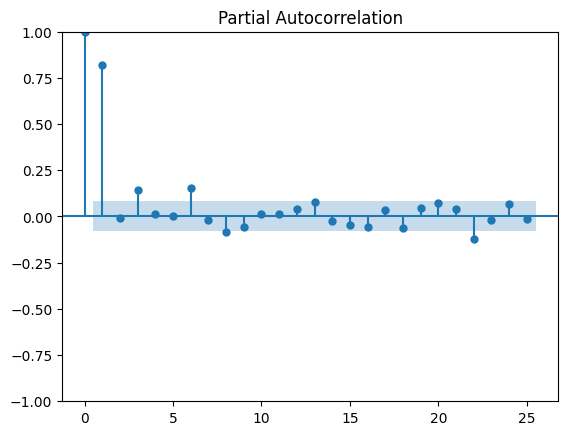

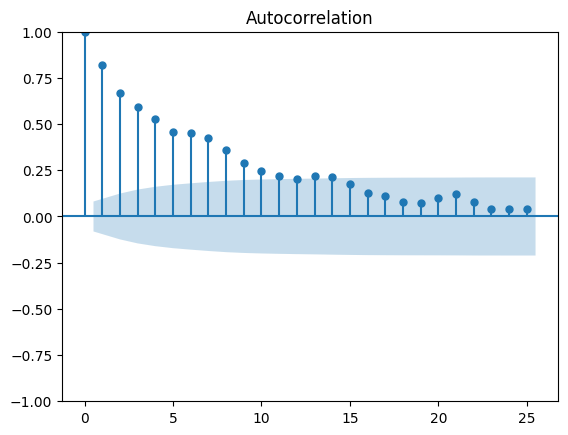

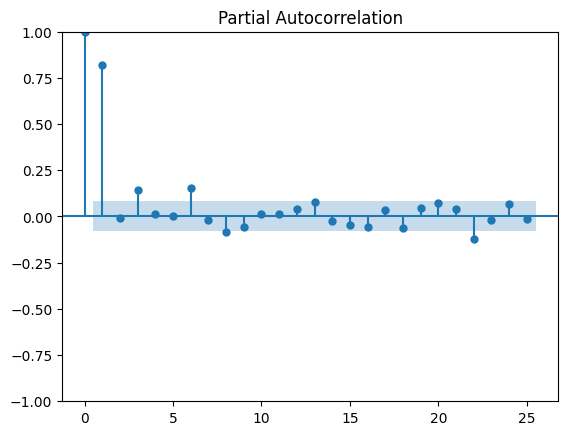

In [38]:
# Visualize autocorrelation using plot_acf
plot_acf(GWAP_train, lags=25, alpha=0.05)  # Plot autocorrelation using plot_acf with confidence interval
# Generate a partial autocorrelation plot
plot_pacf(GWAP_train, lags=25, alpha=0.05)

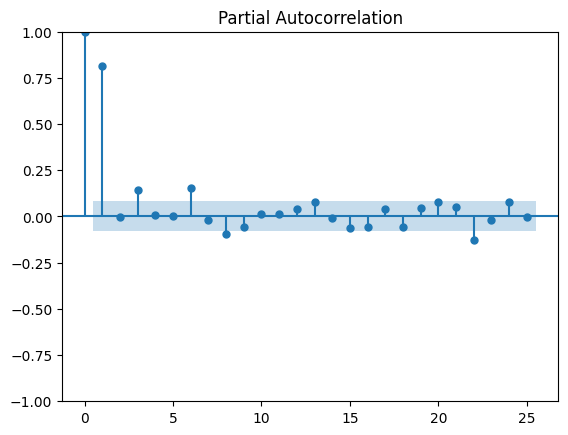

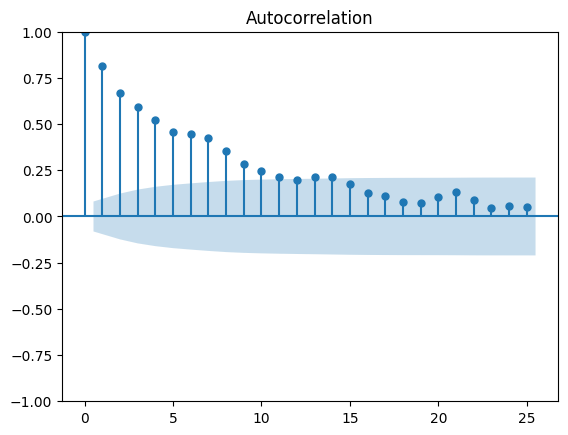

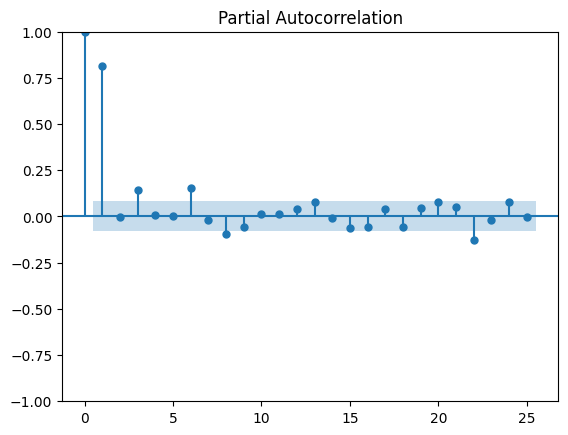

In [39]:
#VISAYAS LWAP
# Visualize autocorrelation using plot_acf
plot_acf(LWAP_train, lags=25, alpha=0.05)  # Plot autocorrelation using plot_acf with confidence interval
# Generate a partial autocorrelation plot
plot_pacf(LWAP_train, lags=25, alpha=0.05)

Forecast using statsmodels

In [22]:
def seasonal_auto_arima(df, max_p, max_d, max_q, exog_data=None):
    lowest_aic = float("inf")
    best_model = None
    
    # Sequence of seasonal periods to try
    seq = [1,2,3,4,5,6,7,14,30]
    for i in seq:
        try:
            model = auto_arima(df, 
                               start_p=0, start_d=0, start_q=0,
                               max_p=max_p, max_d=max_d, max_q=max_q, 
                               seasonal=True, m=i, 
                               start_P=0, start_D=0, start_Q=0,
                               error_action='warn', trace=False,
                               suppress_warnings=True, stepwise=False,
                               exog=exog_data, 
                               maxiter=300, method='powell')
            
            if model.aic() < lowest_aic:
                lowest_aic = model.aic()
                best_model = model

        except Exception as e:
            print(f"Model fitting failed for seasonality {i}: {e}")

    try:
        model = auto_arima(df, 
                           start_p=0, start_d=0, start_q=0,
                           max_p=max_p, max_d=max_d, max_q=max_q, 
                           seasonal=False,
                           error_action='warn', trace=False,
                           suppress_warnings=True, stepwise=False,
                           exog=exog_data, 
                           maxiter=300, method='powell')
        
        if model.aic() < lowest_aic:
            lowest_aic = model.aic()
            best_model = model

    except Exception as e:
        print(f"Non-seasonal model fitting failed: {e}")

    if best_model is not None:
        if best_model.seasonal_order == (0, 0, 0, 0):
            print(f"The model with the lowest AIC is non-seasonal with an AIC of {lowest_aic}")
        else:
            print(f"The model with the lowest AIC has a seasonal period of {best_model.seasonal_order[3]} and an AIC of {lowest_aic}")
    else:
        print("No suitable model found.")
        
    return best_model

# Example usage
# data = pd.read_csv('your_time_series_data.csv', parse_dates=True, index_col='Date')
# exog_data = pd.read_csv('your_exogenous_data.csv', parse_dates=True, index_col='Date')
# best_model = seasonal_auto_arima('your_target_column', data, max_p=5, max_d=2, max_q=5, exog_data=exog_data)


In [23]:
GWAP_sarimax = seasonal_auto_arima(GWAP_train, max_p=1, max_d=2, max_q=10, exog_data=diff_exog_train )

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecatio

The model with the lowest AIC has a seasonal period of 14 and an AIC of -1318.9123847629455


In [24]:
GWAP_sarimax

ARIMA(maxiter=300, method='powell', order=(1, 1, 1), scoring_args={},
      seasonal_order=(2, 0, 0, 14), suppress_warnings=True)

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sa

Optimization terminated successfully.
         Current function value: -1.134863
         Iterations: 3
         Function evaluations: 453


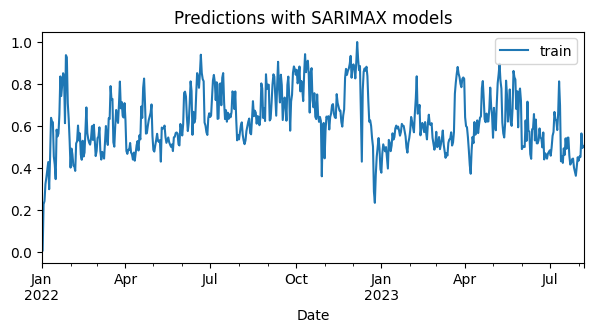

In [40]:
#Using statsmodels

gwap_model = SARIMAX(endog = GWAP_train, exog = diff_exog_train, order=(1, 1, 1), seasonal_order=(2,0,0,14))
gwap_model_results=gwap_model.fit(method='powell', maxiter=300)

gwap_train_predict = gwap_model_results.predict(start='2022-01-01', end='2023-08-07', exog=diff_exog_train)
fig, ax = plt.subplots(figsize=(7, 3))
GWAP_train.plot(ax=ax, label='train')
ax.set_title('Predictions with SARIMAX models')
ax.legend()

In [41]:
gwap_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                GWAP   No. Observations:                  584
Model:             SARIMAX(1, 1, 1)x(2, 0, [], 14)   Log Likelihood                 662.760
Date:                             Wed, 29 Jan 2025   AIC                          -1293.521
Time:                                     21:18:16   BIC                          -1223.630
Sample:                                 01-01-2022   HQIC                         -1266.278
                                      - 08-07-2023                                         
Covariance Type:                               opg                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
FLOW_VIS               -0.0104      0.026     -0.396      0.692      -0.062       0.041
TMIN_Dumaguete         -0.0003      0.019     -0.014      0.989      -0.037       0.037
TMAX_Catbalogan         0.0056      0.019      0.295      0.768      -0.032       0.043
RESERVE_GWAP_Fr        -0.0661      0.024     -2.796      0.005      -0.112      -0.020
RESERVE_GWAP_Ru        -0.0144      0.015     -0.938      0.348      -0.045       0.016
RESERVE_GWAP_Rd        -0.0028      0.007     -0.387      0.699      -0.017       0.011
RESERVE_GWAP_Dr         0.0081      0.014      0.573      0.567      -0.020       0.036
RAINFALL_Catbalogan     0.0204      0.013      1.591      0.112      -0.005       0.046
RAINFALL_Roxas City    -0.0217      0.012     -1.798      0.072      -0.045       0.002
RAINFALL_Catarman      -0.0202      0.015     -1.303      0.192      -0.051       0.010
RAINFALL_Maasin        -0.0075      0.013     -0.602      0.547      -0.032       0.017
ar.L1                  -0.0737      0.403     -0.183      0.855      -0.864       0.717
ma.L1                  -0.0346      0.405     -0.085      0.932      -0.829       0.760
ar.S.L14                0.1058      0.038      2.816      0.005       0.032       0.179
ar.S.L28                0.1995      0.048      4.150      0.000       0.105       0.294
sigma2                  0.0060      0.000     19.463      0.000       0.005       0.007
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                30.37
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                            -0.05
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

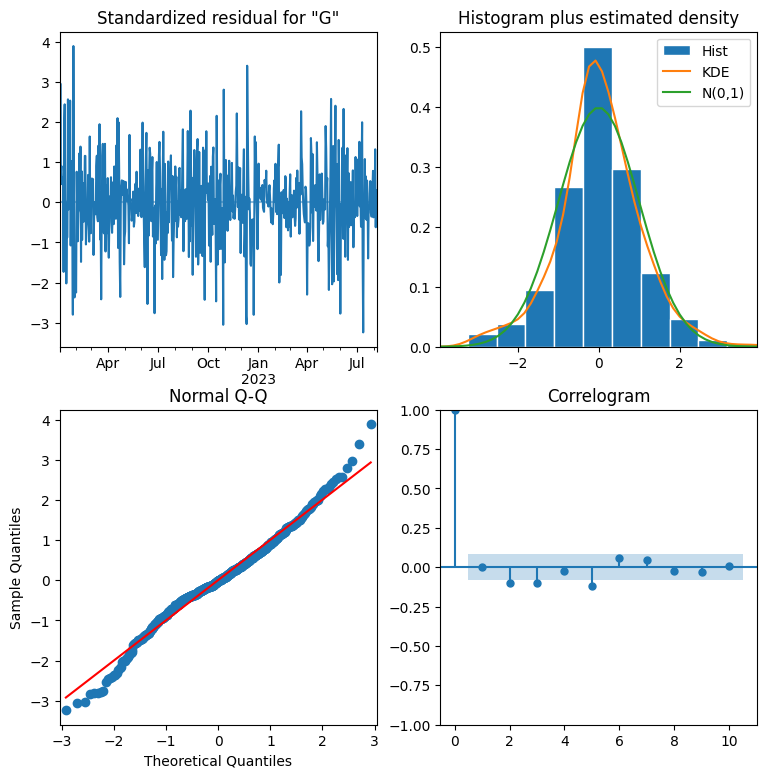

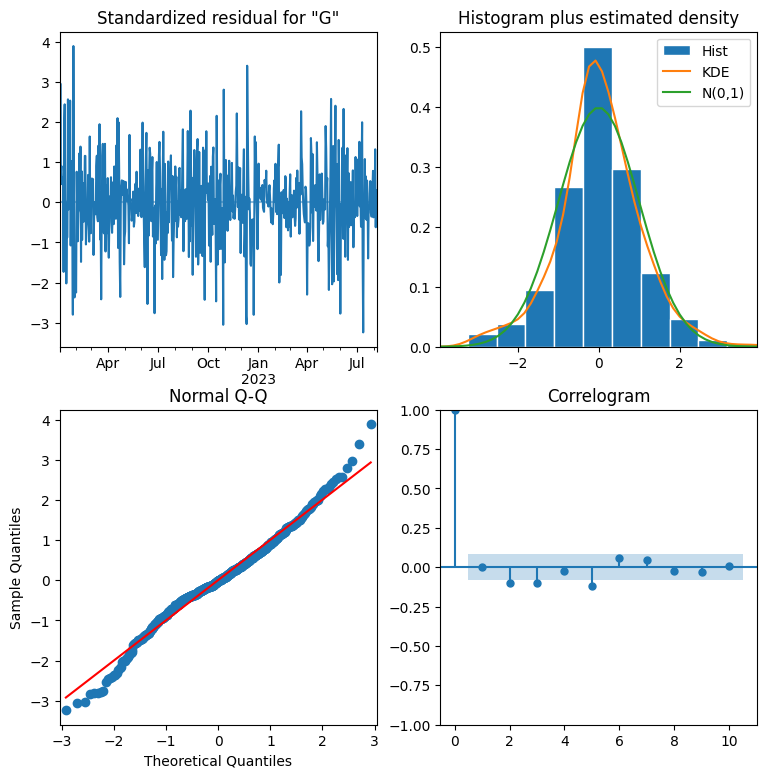

In [42]:
gwap_model_results.plot_diagnostics(figsize=(9,9))


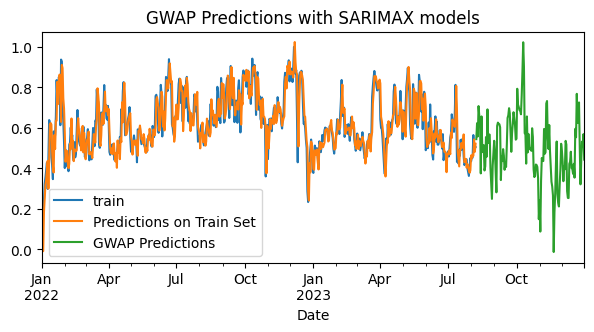

In [43]:

#Append model results to original data
appended_gwap = gwap_model_results.append(GWAP_test, exog=diff_exog_test, refit=False)

#Forecast day-ahead
gwap_test_predict = appended_gwap.predict(start='2023-8-8', end='2023-12-31', exog=diff_exog_test, dynamic=False)

fig, ax = plt.subplots(figsize=(7, 3))
GWAP_train.plot(ax=ax, label='train')
gwap_train_predict.plot(ax=ax, label='Predictions on Train Set')
gwap_test_predict.plot(ax=ax, label='GWAP Predictions')
ax.set_title('GWAP Predictions with SARIMAX models')
ax.legend()

In [34]:
LWAP_sarimax = seasonal_auto_arima(LWAP_train, max_p=1, max_d=2, max_q=14, exog_data=diff_exog_train )

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecatio

The model with the lowest AIC has a seasonal period of 14 and an AIC of -1222.0867039329976


In [35]:
LWAP_sarimax

ARIMA(maxiter=300, method='powell', order=(1, 1, 1), scoring_args={},
      seasonal_order=(2, 0, 0, 14), suppress_warnings=True)

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sa

Optimization terminated successfully.
         Current function value: -1.078260
         Iterations: 14
         Function evaluations: 2116


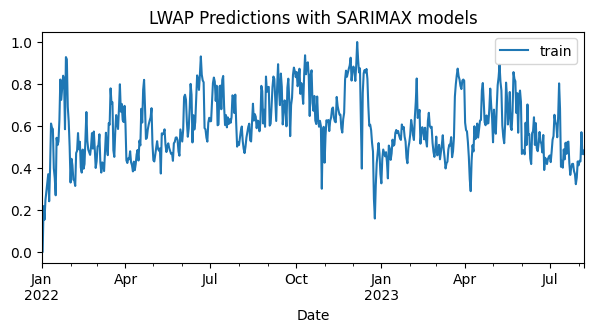

In [44]:

lwap_model = SARIMAX(endog = LWAP_train, exog = diff_exog_train, order=(1, 1, 1), seasonal_order=(2,0,0,14))
lwap_model_results=lwap_model.fit(method='powell', maxiter=300)
#Check fit on train set
lwap_train_predict = lwap_model_results.predict(start='2022-01-01', end='2023-08-07', exog=diff_exog_train)
fig, ax = plt.subplots(figsize=(7, 3))
LWAP_train.plot(ax=ax, label='train')
ax.set_title('LWAP Predictions with SARIMAX models')
ax.legend()

In [45]:
lwap_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                LWAP   No. Observations:                  584
Model:             SARIMAX(1, 1, 1)x(2, 0, [], 14)   Log Likelihood                 629.704
Date:                             Wed, 29 Jan 2025   AIC                          -1227.408
Time:                                     21:20:09   BIC                          -1157.517
Sample:                                 01-01-2022   HQIC                         -1200.166
                                      - 08-07-2023                                         
Covariance Type:                               opg                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
FLOW_VIS                0.0123      0.027      0.449      0.654      -0.041       0.066
TMIN_Dumaguete         -0.0021      0.021     -0.102      0.919      -0.043       0.038
TMAX_Catbalogan         0.0066      0.021      0.310      0.757      -0.035       0.048
RESERVE_GWAP_Fr        -0.0694      0.024     -2.901      0.004      -0.116      -0.023
RESERVE_GWAP_Ru        -0.0151      0.017     -0.886      0.375      -0.048       0.018
RESERVE_GWAP_Rd        -0.0024      0.008     -0.287      0.774      -0.019       0.014
RESERVE_GWAP_Dr         0.0087      0.014      0.626      0.531      -0.019       0.036
RAINFALL_Catbalogan     0.0286      0.014      1.989      0.047       0.000       0.057
RAINFALL_Roxas City    -0.0216      0.013     -1.634      0.102      -0.047       0.004
RAINFALL_Catarman      -0.0225      0.017     -1.331      0.183      -0.056       0.011
RAINFALL_Maasin        -0.0090      0.014     -0.664      0.506      -0.035       0.017
ar.L1                   0.8287      0.025     33.790      0.000       0.781       0.877
ma.L1                  -0.9862      0.010   -102.523      0.000      -1.005      -0.967
ar.S.L14                0.1144      0.038      2.989      0.003       0.039       0.189
ar.S.L28                0.1979      0.050      3.954      0.000       0.100       0.296
sigma2                  0.0067      0.000     19.390      0.000       0.006       0.007
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                41.74
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             0.18
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

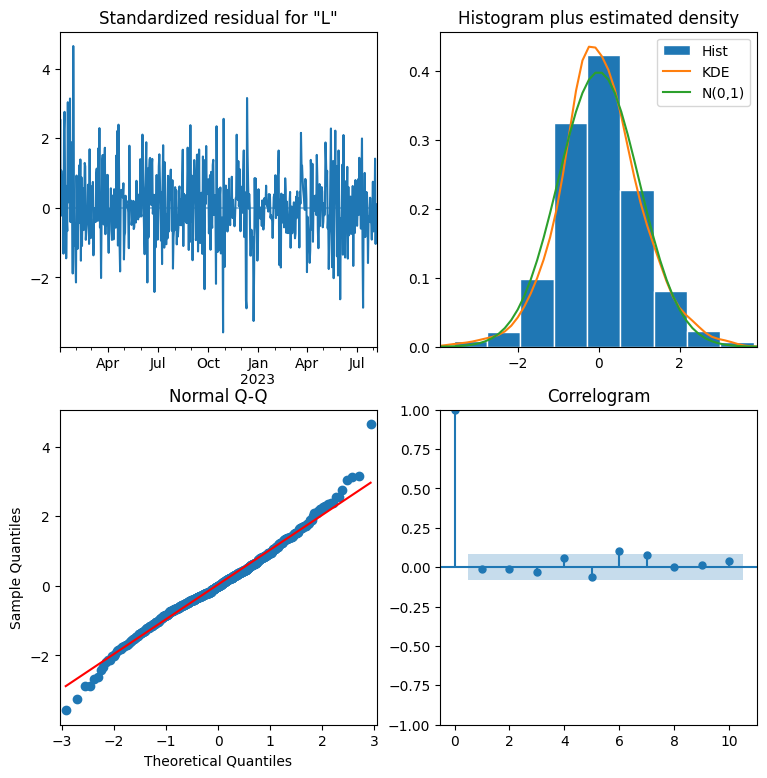

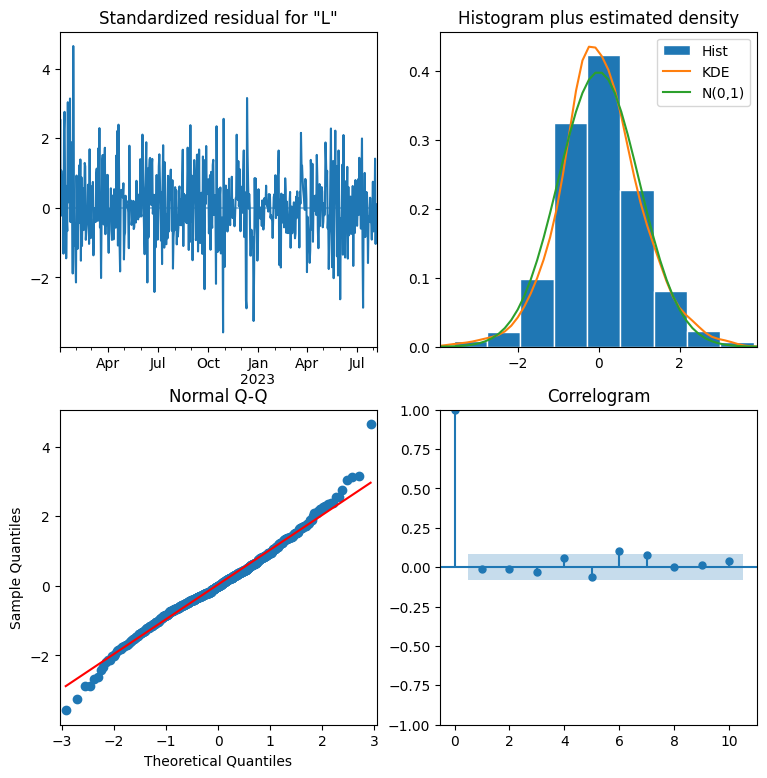

In [46]:
lwap_model_results.plot_diagnostics(figsize=(9,9))

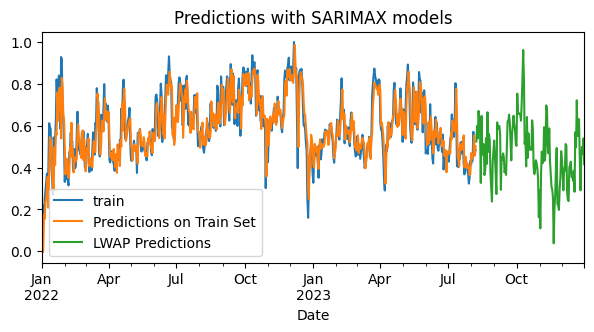

In [47]:
#Append model results to original data
appended_lwap = lwap_model_results.append(LWAP_test, exog=diff_exog_test, refit=False)

#Forecast day-ahead
lwap_test_predict = appended_lwap.predict(start='2023-8-8', end='2023-12-31', exog=diff_exog_test, dynamic=False)

fig, ax = plt.subplots(figsize=(7, 3))
LWAP_train.plot(ax=ax, label='train')
lwap_train_predict.plot(ax=ax, label='Predictions on Train Set')
lwap_test_predict.plot(ax=ax, label='LWAP Predictions')
ax.set_title('Predictions with SARIMAX models')
ax.legend()

Applying inverse transformations - non-rolling

In [48]:
all_predictions = pd.concat([gwap_test_predict, lwap_test_predict], axis=1)
all_predictions_inverse=boxcoxy_fit_loaded.inverse_transform(all_predictions)
all_predictions_inverse

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but PowerTransformer was fitted with feature names



array([[ 6236.78578629,  6966.1552062 ],
       [ 8754.07991366,  9267.0267055 ],
       [ 6598.76533091,  7368.82623239],
       [12731.2991709 , 12331.19067618],
       [10219.79178455,  9727.99317788],
       [ 9267.74449737,  8806.53896716],
       [ 3102.04544106,  3447.97829766],
       [10137.50220057, 11197.32778152],
       [ 5019.0135785 ,  5528.0300134 ],
       [ 4760.16256793,  5627.35785534],
       [ 5499.88421637,  6659.16853611],
       [ 3286.5361669 ,  3920.84542924],
       [ 3573.19132398,  4270.89139424],
       [ 6509.53098626,  7397.03259286],
       [ 4339.47296115,  4712.92312268],
       [11833.63418002, 12016.65406602],
       [ 5741.06899808,  5798.33261239],
       [ 6892.63673315,  7996.27314128],
       [ 6842.12259965,  7176.54560465],
       [ 3471.94645795,  4020.39438989],
       [ 2493.92013627,  3248.26043594],
       [ 1889.60006555,  2568.18541739],
       [ 3622.5888146 ,  4848.95216161],
       [ 4694.30402632,  5787.90666098],
       [ 6022.33

In [49]:
all_predictions_inverse_df = pd.DataFrame(all_predictions_inverse)
all_predictions_inverse_df.rename(columns={'0': 'GWAP', '1': 'LWAP'}, inplace=True)

GWAP_predictions_inverse = pd.DataFrame(all_predictions_inverse[:, 0], columns=['GWAP'])
GWAP_predictions_inverse = pd.concat([test_date,GWAP_predictions_inverse], axis=1)
GWAP_predictions_inverse.set_index('Date', inplace=True)
GWAP_predictions_inverse.index = pd.to_datetime(GWAP_predictions_inverse.index)
GWAP_predictions_inverse.index.freq='D'
GWAP_predictions_inverse = GWAP_predictions_inverse.squeeze()

LWAP_predictions_inverse = pd.DataFrame(all_predictions_inverse[:, 1], columns=['LWAP'])
LWAP_predictions_inverse = pd.concat([test_date,LWAP_predictions_inverse], axis=1)
LWAP_predictions_inverse.set_index('Date', inplace=True)
LWAP_predictions_inverse.index = pd.to_datetime(LWAP_predictions_inverse.index)
LWAP_predictions_inverse.index.freq='D'
LWAP_predictions_inverse = LWAP_predictions_inverse.squeeze()

In [50]:
# Calculate MAE for the Visayas GWAP test set
mae_test = mean_absolute_error(GWAP_test_inversed, GWAP_predictions_inverse)
print(f"Mean Absolute Error (MAE) on Test Set: {mae_test}")

# Calculate RMSE for the Visayas GWAP test set
mse_test = mean_squared_error(GWAP_test_inversed, GWAP_predictions_inverse)
rmse_test = np.sqrt(mse_test)
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse_test}")
GWAP.plot(ax=ax, label='Original Data')
GWAP_predictions_inverse.plot(ax=ax, label='Predictions on Test Set', linestyle='--')
ax.set_title('SARIMAX Visayas GWAP Predictions')
ax.legend()
plt.show()

Mean Absolute Error (MAE) on Test Set: 2467.729390962528
Root Mean Squared Error (RMSE) on Test Set: 4654.625913148451


Mean Absolute Error (MAE) on Test Set: 2114.0275861757086
Root Mean Squared Error (RMSE) on Test Set: 3500.482617414558


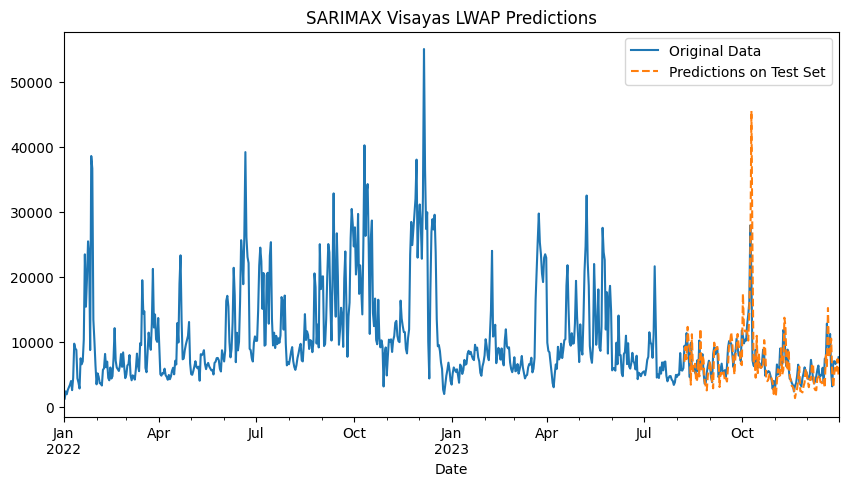

In [51]:
# Calculate MAE for the Visayas LWAP test set
mae_test = mean_absolute_error(LWAP_test_inversed, LWAP_predictions_inverse)
print(f"Mean Absolute Error (MAE) on Test Set: {mae_test}")

# Calculate RMSE for the Visayas LWAP test set
mse_test = mean_squared_error(LWAP_test_inversed, LWAP_predictions_inverse)
rmse_test = np.sqrt(mse_test)
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse_test}")

# Plot predictions
fig, ax = plt.subplots(figsize=(10, 5))
LWAP.plot(ax=ax, label='Original Data')
LWAP_predictions_inverse.plot(ax=ax, label='Predictions on Test Set', linestyle='--')
ax.set_title('SARIMAX Visayas LWAP Predictions')
ax.legend()
plt.show()

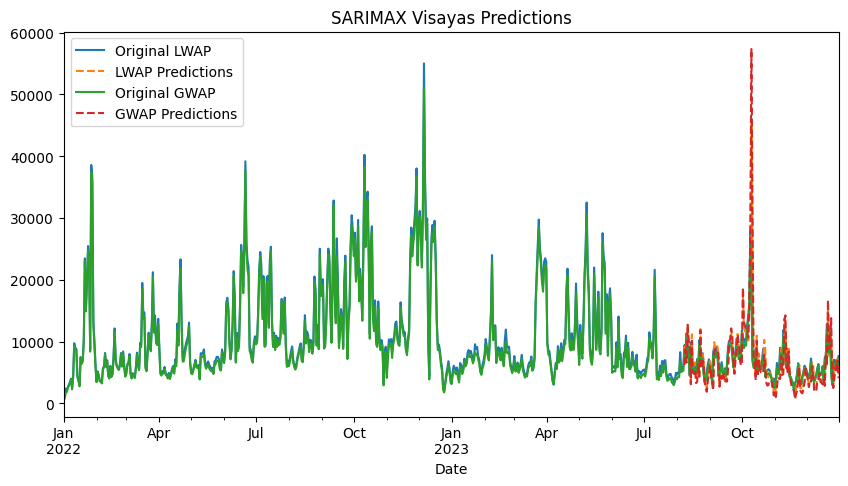

In [52]:
fig, ax = plt.subplots(figsize=(10, 5))
LWAP.plot(ax=ax, label='Original LWAP')
LWAP_predictions_inverse.plot(ax=ax, label='LWAP Predictions', linestyle='--')
GWAP.plot(ax=ax, label='Original GWAP')
GWAP_predictions_inverse.plot(ax=ax, label='GWAP Predictions', linestyle='--')
ax.set_title('SARIMAX Visayas Predictions')
ax.legend()
plt.show()

In [49]:
GWAP_predictions_inverse.to_csv('vis-gwap-predictions.csv', index=False)
LWAP_predictions_inverse.to_csv('vis-lwap-predictions.csv', index=False)